### In this notebook the available social networks are explored and grouped into groups of similarly sized datasets
#### The output is a csv file that is used by the download script to download the datasets

In [1]:
# reload imported files automatically without restarting the kernel
%load_ext autoreload
%autoreload 2

Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from humanfriendly import parse_size # to parse human readable file sizes
from lib import *
from collections import namedtuple


Config

In [3]:
sns.set()


In [4]:
# define more readable column names for table (no LaTeX)
column_names = [
    "name",
    "title",
    "nodes",
    "edges",
    "avg_degree",
    "std_dev_degree",
    "largest_eigenvalue_hashimoto",
    "random walk mixing time",
    "degree assortativity",
    "global clustering",
    "diameter",
    "relative_size_of_largest_component",
    "kind",
    "mode",
    "number_of_networks",
    "tags",
]


In [5]:
df = pd.read_html("https://networks.skewed.de/")[
    0
]  # get a dataframe of all datasets on Netzschleuder


In [6]:
df.columns = column_names  # set column names


In [7]:
df.head(3)

,name,title,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random walk mixing time,degree assortativity,global clustering,diameter,relative_size_of_largest_component,kind,mode,number_of_networks,tags
0,7th_graders,Vickers 7th Graders (1981),29,740,25.52,20.34,17.73,1.71,-0.01,0.76,2,1.00,Directed,Unipartite,1,Social Offline Multilayer Unweighted Metadata
1,academia_edu,Academica.edu (2011),200169,1398063,6.98,46.24,109.99,78.34,-0.02,0.04,16,1.00,Directed,Unipartite,1,Social Online Unweighted
2,add_health,Adolescent health (ADD HEALTH) (1994),2587,12969,5.01,5.65,11.92,29.03,0.29,0.17,10,0.98,Directed,Unipartite,84,Social Offline Weighted


### Create filters for size and type of networks

In [8]:
# create dataset filters for social network datasets
social_networks = df["tags"].str.contains("Social")
unweighted = df["tags"].str.contains("Unweighted")
undirected = df["kind"] == "Undirected"
online = df["tags"].str.contains("Online")
offline = df["tags"].str.contains("Offline")


In [9]:
online_social_filter = (
    online & social_networks & unweighted & undirected
)  # filter for desired online social networks
offline_social_filter = (
    offline & social_networks & unweighted & undirected
)  # filter for desired offline social networks


### We apply filters to filter datasets

**NOTE**: These datasets contain multiple networks, we will filter them further, and from now on call these **network groups**

In [10]:
online_social = df[online_social_filter]
# filter df for social, unweighted, online, undirected networks
len(online_social)
print("Number of online social network groups:", len(online_social))
online_social.head(3)


Number of online social network groups: 15


,name,title,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random walk mixing time,degree assortativity,global clustering,diameter,relative_size_of_largest_component,kind,mode,number_of_networks,tags
74,douban,Douban friendship network (2009),154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,1,Social Online Unweighted
82,ego_social,Ego networks in social media (2012),107614,12238285,227.45,581.50,1718.72,110.57,-0.08,0.15,6,1.00,Undirected,Unipartite,143,Social Online Unweighted Metadata
96,facebook_friends,Maier Facebook friends (2014),362,1988,10.98,10.83,23.30,78.68,0.10,0.51,9,0.91,Undirected,Unipartite,1,Social Online Unweighted Metadata


In [11]:
# filter df for social, unweighted, online, undirected networks
offline_social = df[social_networks & offline & unweighted & undirected]
print("Number of offline social network groups:", len(offline_social))
online_social.head(3)


Number of offline social network groups: 17


,name,title,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random walk mixing time,degree assortativity,global clustering,diameter,relative_size_of_largest_component,kind,mode,number_of_networks,tags
74,douban,Douban friendship network (2009),154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,1,Social Online Unweighted
82,ego_social,Ego networks in social media (2012),107614,12238285,227.45,581.50,1718.72,110.57,-0.08,0.15,6,1.00,Undirected,Unipartite,143,Social Online Unweighted Metadata
96,facebook_friends,Maier Facebook friends (2014),362,1988,10.98,10.83,23.30,78.68,0.10,0.51,9,0.91,Undirected,Unipartite,1,Social Online Unweighted Metadata


In [12]:
online_social.agg(
    {"nodes": ["mean", "median", "std"], "edges": ["mean", "median", "std"]}
).style.format("{:.0f}").set_caption("Online Social Network Groups")


,nodes,edges
mean,5082770,126652876
median,154908,2777419
std,16781456,464657993


In [13]:
offline_social.agg(
    {"nodes": ["mean", "median", "std"], "edges": ["mean", "median", "std"]}
).style.format("{:.0f}").set_caption("Offline Social Network Groups")


,nodes,edges
mean,905,192800
median,180,20818
std,2617,416200


### We filter dataset groups into networks

In [14]:
BASE_URL = "https://networks.skewed.de/net/"


In [15]:
online_network_group_names = online_social["name"].to_numpy()
online_network_group_names


array(['douban', 'ego_social', 'facebook_friends',
       'facebook_organizations', 'flickr_groups', 'flixster',
       'foursquare', 'foursquare_friendships', 'foursquare_global',
       'hyves', 'lastfm', 'livemocha', 'marker_cafe', 'petster',
       'soc_net_comms'], dtype=object)

In [16]:
offline_network_group_names = offline_social["name"].to_numpy()
offline_network_group_names


array(['contact', 'copenhagen', 'crime', 'dutch_criticism', 'karate',
       'november17', 'reality_mining', 'sp_colocation', 'sp_high_school',
       'sp_high_school_new', 'sp_hospital', 'sp_hypertext',
       'sp_infectious', 'sp_kenyan_households', 'student_cooperation',
       'terrorists_911', 'ugandan_village'], dtype=object)

In [17]:
NetworkProperties = namedtuple(
    "NetworkProperties",
    [
        "group",
        "name",
        "nodes",
        "edges",
        "avg_degree",
        "std_dev_degree",
        "largest_eigenvalue_hashimoto",
        "random_walk_mixing_time",
        "degree_assortativity",
        "global_clustering",
        "diameter",
        "relative_size_of_largest_component",
        "kind",
        "mode",
        "node_properties",
        "edge_properties",
        "gml_file_size"
    ],
)  # create tuple to hold network properties


In [18]:
def get_network_data(network_group_names: list) -> pd.DataFrame:
    """
    Get info of all networks contained in the network groups.
    """
    result_tuples = []

    for network_group in network_group_names:
        URL = BASE_URL + network_group
        df = pd.read_html(URL)[0]
        for i, row in df.iterrows():
            curr_result = NetworkProperties(
                group=network_group,
                name=row["Name"],
                nodes=row["Nodes"],
                edges=row["Edges"],
                avg_degree=row["$\\left<k\\right>$"],
                std_dev_degree=row["$\\sigma_k$"],
                largest_eigenvalue_hashimoto=row["$\\lambda_h$"],
                random_walk_mixing_time=row["$\\tau$"],
                degree_assortativity=row["$r$"],
                global_clustering=row["$c$"],
                diameter=row["$\\oslash$"],
                relative_size_of_largest_component=row["$S$"],
                kind=row["Kind"],
                mode=row["Mode"],
                node_properties=row["NPs"],
                edge_properties=row["EPs"],
                gml_file_size=row["GML"],
            )
            result_tuples.append(curr_result)

    return pd.DataFrame(result_tuples)


In [19]:
all_online_networks = get_network_data(online_network_group_names)
assert(all_online_networks["kind"] == "Undirected").all() # check if all networks are undirected
all_online_networks


,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size
0,douban,douban,154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,NaN,NaN,3.3 MiB
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22 KiB
2,ego_social,facebook_107,1034,26749,51.74,47.00,122.05,51.91,0.43,0.50,9,1.00,Undirected,Unipartite,name feat circles,NaN,119 KiB
3,ego_social,facebook_348,224,3192,28.50,22.37,48.64,81.92,0.22,0.49,9,1.00,Undirected,Unipartite,name feat circles,NaN,19 KiB
4,ego_social,facebook_414,150,1693,22.57,13.06,34.42,243.01,0.31,0.65,7,0.99,Undirected,Unipartite,name feat circles,NaN,11 KiB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,soc_net_comms,livejournal,3997962,34681189,17.35,42.96,447.52,8545.04,0.05,0.13,21,1.00,Undirected,Unipartite,name communities,NaN,183.0 MiB
166,soc_net_comms,orkut,3072441,117185083,76.28,154.78,776.75,190.23,0.02,0.04,9,1.00,Undirected,Unipartite,name communities,NaN,767.1 MiB
167,soc_net_comms,youtube,1134890,2987624,5.27,50.75,185.14,492.62,-0.04,0.01,24,1.00,Undirected,Unipartite,name communities,NaN,15.0 MiB
168,soc_net_comms,dblp,317080,1049866,6.62,10.01,114.72,372.79,0.27,0.31,23,1.00,Undirected,Unipartite,name communities,NaN,9.6 MiB


In [20]:
all_offline_networks = get_network_data(offline_network_group_names)
all_offline_networks


,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size
0,contact,contact,274,28244,206.16,460.93,50.52,2.49,-0.05,0.90,4,1.00,Undirected,Unipartite,NaN,weight time,150 KiB
1,copenhagen,sms,568,24333,42.84,247.58,3.47,1653.09,0.87,0.03,20,0.80,Directed,Unipartite,id female,timestamp,122 KiB
2,copenhagen,fb_friends,800,6429,16.07,13.38,30.19,8.18,0.18,0.24,7,1.00,Undirected,Unipartite,id female,NaN,36 KiB
3,copenhagen,calls,536,3600,6.72,18.28,4.14,452.76,0.66,0.09,22,0.65,Directed,Unipartite,id female,timestamp duration,33 KiB
4,copenhagen,bt,692,2426279,7012.37,4950.73,281.14,17.83,0.14,0.71,5,1.00,Undirected,Unipartite,id female,timestamp rssi,7.2 MiB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ugandan_village,health-advice_13,173,358,4.14,4.55,6.56,11.98,-0.11,0.06,8,0.91,Undirected,Unipartite,name,NaN,9 KiB
60,ugandan_village,health-advice_14,120,365,6.08,4.88,7.42,4.09,-0.16,0.11,6,1.00,Undirected,Unipartite,name,NaN,6 KiB
61,ugandan_village,health-advice_15,117,210,3.59,4.81,5.93,11.11,-0.26,0.06,8,1.00,Undirected,Unipartite,name,NaN,6 KiB
62,ugandan_village,health-advice_16,350,984,5.62,12.54,12.83,5.29,-0.20,0.05,7,1.00,Undirected,Unipartite,name,NaN,18 KiB


In [21]:
# noticed that there are (contrary to the description in the group) some Directed networks in the group, removing them
all_offline_networks = all_offline_networks[all_offline_networks["kind"] == "Undirected"]
assert(all_offline_networks["kind"] == "Undirected").all() # check if all networks are undirected

###  We check the network size distribution of available datasets

In this first linearly scaled plot, we can see that there is an extreme outlier present in the online
social network datasets.

In [22]:
online_sizes = sorted(all_online_networks["nodes"].to_numpy())
online_sizes


[8,
 19,
 22,
 34,
 35,
 52,
 54,
 61,
 83,
 92,
 94,
 97,
 102,
 108,
 117,
 120,
 131,
 150,
 165,
 168,
 168,
 175,
 215,
 224,
 252,
 258,
 268,
 296,
 307,
 320,
 320,
 321,
 326,
 333,
 338,
 344,
 362,
 373,
 417,
 422,
 452,
 461,
 475,
 476,
 488,
 492,
 495,
 498,
 511,
 521,
 534,
 550,
 559,
 562,
 575,
 627,
 638,
 694,
 747,
 762,
 769,
 773,
 780,
 786,
 792,
 851,
 923,
 1007,
 1034,
 1052,
 1079,
 1083,
 1175,
 1179,
 1187,
 1243,
 1302,
 1371,
 1374,
 1429,
 1473,
 1520,
 1548,
 1556,
 1589,
 1604,
 1650,
 1662,
 1730,
 1743,
 1842,
 1889,
 2009,
 2017,
 2156,
 2187,
 2213,
 2224,
 2332,
 2426,
 2455,
 2512,
 2590,
 2614,
 2658,
 2761,
 3091,
 3100,
 3134,
 3143,
 3154,
 3347,
 3455,
 3490,
 3508,
 3545,
 3799,
 3814,
 3862,
 3870,
 3939,
 4039,
 4160,
 4229,
 4289,
 4362,
 4369,
 4450,
 4482,
 4503,
 4520,
 4586,
 4604,
 4712,
 4720,
 4720,
 4734,
 4782,
 4805,
 4831,
 4842,
 4872,
 4880,
 4895,
 4903,
 4926,
 4936,
 4938,
 5524,
 5793,
 6410,
 69413,
 104103,
 10761

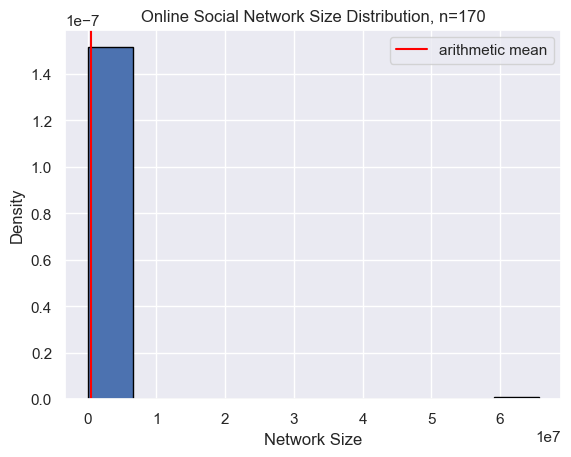

In [23]:
plot_distribution(
    online_sizes,
    xlabel="Network Size",
    title="Online Social Network Size Distribution, n={}".format(len(online_sizes)),
)
plt.ticklabel_format(useOffset=False)

plot_vertical_line(np.mean(online_sizes), "arithmetic mean")
plt.legend()


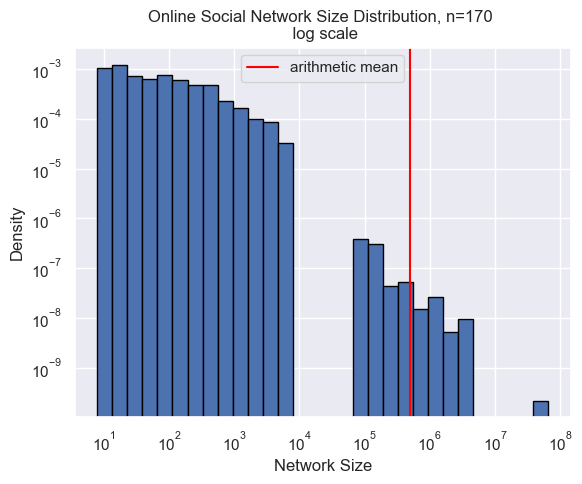

In [24]:
plot_distribution(
    online_sizes,
    xlabel="Network Size",
    title="Online Social Network Size Distribution, n={} \n log scale".format(
        len(online_sizes)
    ),
    bins=logarithmic_bins(online_sizes, 30),
    x_scale="log",
    y_scale="log",
)

plot_vertical_line(np.mean(online_sizes), "arithmetic mean")
plt.legend()


### The available offline social networks are in generall smaller than online social networks

In [25]:
offline_sizes = sorted(all_offline_networks["nodes"].to_numpy())
offline_sizes


[22,
 34,
 34,
 35,
 47,
 62,
 63,
 65,
 75,
 81,
 96,
 100,
 113,
 113,
 117,
 120,
 120,
 121,
 121,
 124,
 126,
 134,
 139,
 168,
 170,
 173,
 173,
 178,
 180,
 182,
 183,
 184,
 185,
 185,
 190,
 192,
 203,
 205,
 207,
 221,
 229,
 232,
 240,
 242,
 250,
 274,
 316,
 320,
 329,
 329,
 332,
 350,
 361,
 369,
 372,
 403,
 692,
 800,
 1380,
 10972]

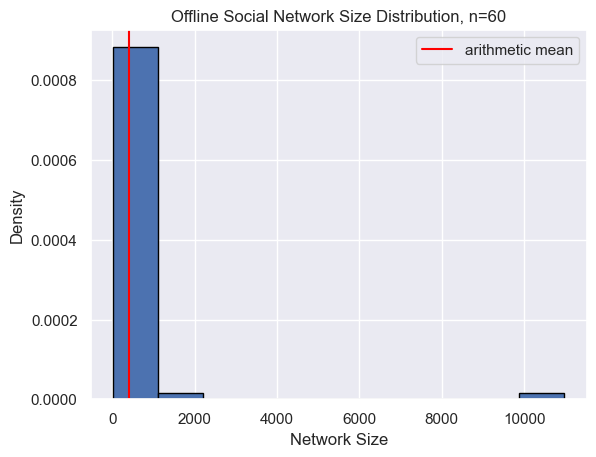

In [26]:
plot_distribution(
    offline_sizes,
    xlabel="Network Size",
    title="Offline Social Network Size Distribution, n={}".format(len(offline_sizes)),
)
plt.ticklabel_format(useOffset=False)

plot_vertical_line(np.mean(offline_sizes), "arithmetic mean")
plt.legend()


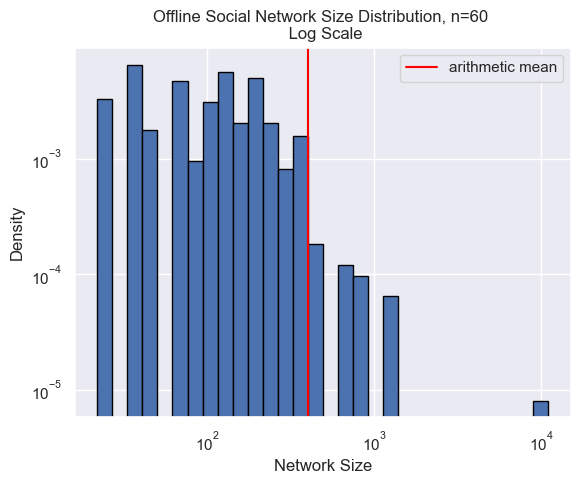

In [27]:
plot_distribution(
    offline_sizes,
    xlabel="Network Size",
    title="Offline Social Network Size Distribution, n={} \n Log Scale".format(
        len(offline_sizes)
    ),
    bins=logarithmic_bins(offline_sizes, 30),
    x_scale="log",
    y_scale="log",
)

plot_vertical_line(np.mean(offline_sizes), "arithmetic mean")
plt.legend()


Create q-cuts to split the networks into groups by network size

In [28]:
def add_q_cut_column(df: pd.DataFrame, column: str, q: int, labels) -> pd.DataFrame:
    """
    Add a column to the dataframe with the quantile cut of the column.
    """
    df[column + "_qcut"] = pd.qcut(df[column], q=q, labels=labels)
    return df

In [29]:
add_q_cut_column(all_online_networks, "nodes", 3, ["small", "medium", "large"])

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,douban,douban,154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,NaN,NaN,3.3 MiB,large
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22 KiB,small
2,ego_social,facebook_107,1034,26749,51.74,47.00,122.05,51.91,0.43,0.50,9,1.00,Undirected,Unipartite,name feat circles,NaN,119 KiB,medium
3,ego_social,facebook_348,224,3192,28.50,22.37,48.64,81.92,0.22,0.49,9,1.00,Undirected,Unipartite,name feat circles,NaN,19 KiB,small
4,ego_social,facebook_414,150,1693,22.57,13.06,34.42,243.01,0.31,0.65,7,0.99,Undirected,Unipartite,name feat circles,NaN,11 KiB,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,soc_net_comms,livejournal,3997962,34681189,17.35,42.96,447.52,8545.04,0.05,0.13,21,1.00,Undirected,Unipartite,name communities,NaN,183.0 MiB,large
166,soc_net_comms,orkut,3072441,117185083,76.28,154.78,776.75,190.23,0.02,0.04,9,1.00,Undirected,Unipartite,name communities,NaN,767.1 MiB,large
167,soc_net_comms,youtube,1134890,2987624,5.27,50.75,185.14,492.62,-0.04,0.01,24,1.00,Undirected,Unipartite,name communities,NaN,15.0 MiB,large
168,soc_net_comms,dblp,317080,1049866,6.62,10.01,114.72,372.79,0.27,0.31,23,1.00,Undirected,Unipartite,name communities,NaN,9.6 MiB,large


In [30]:
all_online_networks.groupby("nodes_qcut").agg(
    {"nodes": ["mean", "median", "std", "count"]}
).style.format("{:.0f}").set_caption("Online Social Network Size Groups")


ego_social network group contains the most balanced network sizes

In [31]:
all_online_networks.groupby("group").agg({
    "nodes_qcut": lambda x: x.value_counts().to_dict()
})

,nodes_qcut
group,
douban,"{'large': 1, 'small': 0, 'medium': 0}"
ego_social,"{'medium': 55, 'small': 54, 'large': 34}"
facebook_friends,"{'small': 1, 'medium': 0, 'large': 0}"
facebook_organizations,"{'large': 3, 'small': 2, 'medium': 1}"
flickr_groups,"{'large': 1, 'small': 0, 'medium': 0}"
flixster,"{'large': 1, 'small': 0, 'medium': 0}"
foursquare,"{'large': 2, 'small': 0, 'medium': 0}"
foursquare_friendships,"{'large': 2, 'small': 0, 'medium': 0}"
foursquare_global,"{'large': 1, 'small': 0, 'medium': 0}"


In [32]:
# example how to get smallest 25% of online networks
all_online_networks[all_online_networks["nodes_qcut"] == "small"].head(3)

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22 KiB,small
3,ego_social,facebook_348,224,3192,28.50,22.37,48.64,81.92,0.22,0.49,9,1.00,Undirected,Unipartite,name feat circles,NaN,19 KiB,small
4,ego_social,facebook_414,150,1693,22.57,13.06,34.42,243.01,0.31,0.65,7,0.99,Undirected,Unipartite,name feat circles,NaN,11 KiB,small


In [33]:
add_q_cut_column(all_offline_networks, "nodes", 3, ["small", "medium", "large"])

/var/folders/9p/yqgvxz3x5fv5wdy31vscjm4r0000gn/T/ipykernel_69107/2467843854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column + "_qcut"] = pd.qcut(df[column], q=q, labels=labels)


,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,contact,contact,274,28244,206.16,460.93,50.52,2.49,-0.05,0.90,4,1.00,Undirected,Unipartite,NaN,weight time,150 KiB,large
2,copenhagen,fb_friends,800,6429,16.07,13.38,30.19,8.18,0.18,0.24,7,1.00,Undirected,Unipartite,id female,NaN,36 KiB,large
4,copenhagen,bt,692,2426279,7012.37,4950.73,281.14,17.83,0.14,0.71,5,1.00,Undirected,Unipartite,id female,timestamp rssi,7.2 MiB,large
5,crime,crime,1380,1476,2.14,2.14,3.28,1385.50,-0.17,0.00,32,0.92,Undirected,Bipartite,meta,NaN,35 KiB,large
6,dutch_criticism,dutch_criticism,35,81,4.63,2.97,5.57,5.29,0.04,0.16,7,1.00,Undirected,Unipartite,id name x y z,weight,2 KiB,small
7,karate,77,34,77,4.53,3.75,5.25,6.98,-0.47,0.26,5,1.00,Undirected,Unipartite,name groups,NaN,1 KiB,small
8,karate,78,34,78,4.59,3.82,5.29,7.05,-0.48,0.26,5,1.00,Undirected,Unipartite,name groups,NaN,1 KiB,small
9,november17,november17,22,66,6.00,3.58,6.78,2.67,-0.25,0.53,4,1.00,Undirected,Unipartite,name Role Faction Resources,NaN,1 KiB,small
10,reality_mining,reality_mining,96,1086404,22633.42,21814.46,58.67,19.34,0.47,0.84,3,1.00,Undirected,Unipartite,NaN,weight time,2.0 MiB,small
11,sp_colocation,Thiers13,332,18613039,112126.74,42531.96,268.38,41.01,0.42,0.98,2,0.99,Undirected,Unipartite,id group,time,46.9 MiB,large


In [34]:
all_offline_networks.groupby("nodes_qcut").agg(
    {"nodes": ["mean", "median", "std", "count"]}
).style.format("{:.0f}").set_caption("Offline Social Network Size Groups")


Ugandan village networks (the ones also used in the paper) have the most balanced distribution of network sizes into groups

In [35]:
all_offline_networks.groupby("group").agg({
    "nodes_qcut": lambda x: x.value_counts().to_dict()
})

,nodes_qcut
group,
contact,"{'large': 1, 'small': 0, 'medium': 0}"
copenhagen,"{'large': 2, 'small': 0, 'medium': 0}"
crime,"{'large': 1, 'small': 0, 'medium': 0}"
dutch_criticism,"{'small': 1, 'medium': 0, 'large': 0}"
karate,"{'small': 2, 'medium': 0, 'large': 0}"
november17,"{'small': 1, 'medium': 0, 'large': 0}"
reality_mining,"{'small': 1, 'medium': 0, 'large': 0}"
sp_colocation,"{'large': 4, 'small': 2, 'medium': 0}"
sp_high_school,"{'large': 2, 'small': 0, 'medium': 0}"


In [36]:
# example how to get smallest 25% of online networks
all_online_networks[all_online_networks["nodes_qcut"] == "small"].head(3)

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22 KiB,small
3,ego_social,facebook_348,224,3192,28.50,22.37,48.64,81.92,0.22,0.49,9,1.00,Undirected,Unipartite,name feat circles,NaN,19 KiB,small
4,ego_social,facebook_414,150,1693,22.57,13.06,34.42,243.01,0.31,0.65,7,0.99,Undirected,Unipartite,name feat circles,NaN,11 KiB,small


In [37]:
all_online_networks

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,douban,douban,154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,NaN,NaN,3.3 MiB,large
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22 KiB,small
2,ego_social,facebook_107,1034,26749,51.74,47.00,122.05,51.91,0.43,0.50,9,1.00,Undirected,Unipartite,name feat circles,NaN,119 KiB,medium
3,ego_social,facebook_348,224,3192,28.50,22.37,48.64,81.92,0.22,0.49,9,1.00,Undirected,Unipartite,name feat circles,NaN,19 KiB,small
4,ego_social,facebook_414,150,1693,22.57,13.06,34.42,243.01,0.31,0.65,7,0.99,Undirected,Unipartite,name feat circles,NaN,11 KiB,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,soc_net_comms,livejournal,3997962,34681189,17.35,42.96,447.52,8545.04,0.05,0.13,21,1.00,Undirected,Unipartite,name communities,NaN,183.0 MiB,large
166,soc_net_comms,orkut,3072441,117185083,76.28,154.78,776.75,190.23,0.02,0.04,9,1.00,Undirected,Unipartite,name communities,NaN,767.1 MiB,large
167,soc_net_comms,youtube,1134890,2987624,5.27,50.75,185.14,492.62,-0.04,0.01,24,1.00,Undirected,Unipartite,name communities,NaN,15.0 MiB,large
168,soc_net_comms,dblp,317080,1049866,6.62,10.01,114.72,372.79,0.27,0.31,23,1.00,Undirected,Unipartite,name communities,NaN,9.6 MiB,large


Get dataset sizes in bytes

In [38]:
all_online_networks["gml_file_size"] = all_online_networks["gml_file_size"].apply(parse_size)
all_offline_networks["gml_file_size"] = all_offline_networks["gml_file_size"].apply(parse_size)

/var/folders/9p/yqgvxz3x5fv5wdy31vscjm4r0000gn/T/ipykernel_69107/3219857331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_offline_networks["gml_file_size"] = all_offline_networks["gml_file_size"].apply(parse_size)


In [39]:
all_online_networks["gml_file_size"]

0        3460300
1          22528
2         121856
3          19456
4          11264
         ...    
165    191889408
166    804362649
167     15728640
168     10066329
169     14470348
Name: gml_file_size, Length: 170, dtype: int64

Remove huge outlier from the online social networks (over 9 GiB file size)

In [40]:
all_online_networks.nlargest(3, "gml_file_size") # show top 3 largest networks

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
164,soc_net_comms,friendster,65608366,1806067135,55.06,137.81,830.62,2153.71,0.19,0.02,37,1.0,Undirected,Unipartite,name communities,NaN,9986872705,large
166,soc_net_comms,orkut,3072441,117185083,76.28,154.78,776.75,190.23,0.02,0.04,9,1.0,Undirected,Unipartite,name communities,NaN,804362649,large
157,foursquare_global,foursquare_global,3935215,22809624,11.59,62.44,163.10,1016.53,0.02,0.00,14,1.0,Undirected,Bipartite,is_user name latitude longitude venue_cat ...,timestap timezone_offset,239180185,large


In [41]:
largest_size = all_online_networks["gml_file_size"].max() # get size in bytes of largest
all_online_networks = all_online_networks[all_online_networks["gml_file_size"] < largest_size] # drop largest row

In [42]:
# save to file
all_offline_networks.to_csv(DATA_DIR_PATH / "offline_social_networks.csv", index=False)
all_online_networks.to_csv(DATA_DIR_PATH / "online_social_networks.csv", index=False)